# car price prediction model 
using sklearn linear regression model

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [37]:
df = pd.read_csv("car data.csv")

In [38]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
df.shape

(301, 9)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [41]:
df.isnull().sum()
# no null value present in the dataset

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [42]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [43]:
df["Seller_Type"].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [44]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [45]:
# encoding the dataset
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# encoder is the object of the LabelEncoder class

In [46]:
df['Fuel_Type']=encoder.fit_transform(df['Fuel_Type'])
df['Seller_Type']=encoder.fit_transform(df['Seller_Type'])
df['Transmission']=encoder.fit_transform(df['Transmission'])
df['Car_Name']=encoder.fit_transform(df['Car_Name'])

In [47]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [48]:
# X--> features (DataFrame)
# y--> traget variable (pandas series)

In [49]:
X = df.drop(columns=['Selling_Price'])

In [50]:
y = df['Selling_Price']

In [51]:
X.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0


In [52]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [54]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [55]:
# model training
LR_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# prediction on training set
y_train_pred = LR_model.predict(X_train)

In [59]:
# prediction on testing set
y_test_pred = LR_model.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
# calculating mean values on training set

train_score1 = mean_absolute_error(y_train, y_train_pred)
train_score2 = mean_squared_error(y_train, y_train_pred)
train_score3 = r2_score(y_train, y_train_pred)

print(train_score1)
print(train_score2)
print(train_score3)

1.1999979172617765
3.207030093295299
0.8838276873188677


In [62]:
# calculating mean values on testing set

test_score1 = mean_absolute_error(y_test, y_test_pred)
test_score2 = mean_squared_error(y_test, y_test_pred)
test_score3 = r2_score(y_test, y_test_pred)

print(test_score1)
print(test_score2)
print(test_score3)

1.2643499369174545
2.932266309752758
0.8403469109878576


compare the y_train and y_train_pred 

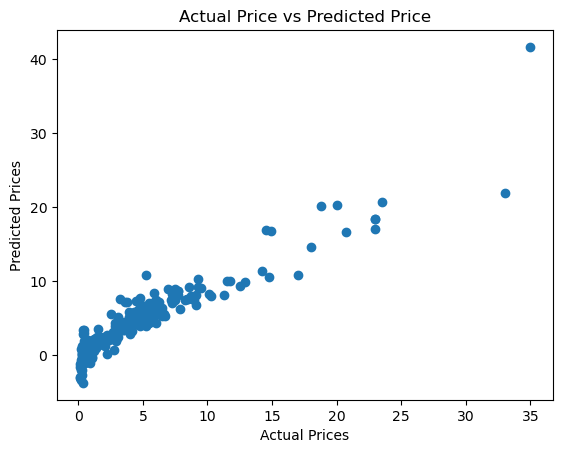

In [63]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

compare the y_test and y_test_pred

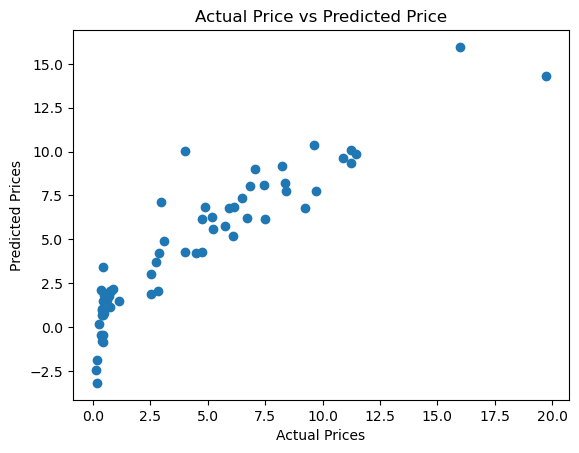

In [64]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [65]:
np.array(y_test)

array([ 9.65,  0.45,  4.75,  3.1 , 11.45,  4.5 ,  2.95,  6.5 ,  0.27,
        6.1 ,  6.7 ,  4.75,  0.35,  8.4 ,  2.55,  0.72,  0.75,  0.48,
       11.25,  4.  ,  1.15,  8.25,  0.45, 10.9 ,  0.5 ,  7.45,  0.6 ,
        0.2 ,  2.9 ,  2.85,  0.45,  2.75,  5.25,  9.7 ,  0.2 ,  5.95,
        8.35,  5.75,  7.5 ,  5.2 , 16.  ,  0.8 ,  0.4 ,  0.35,  4.9 ,
        9.25,  0.38,  6.15, 19.75,  2.55,  6.85,  0.45,  7.05,  0.75,
        0.9 ,  0.38,  0.4 ,  4.  ,  0.45,  0.12, 11.25])

In [66]:
y_test_pred

array([10.39621003,  0.69106454,  4.26163824,  4.88444225,  9.84774111,
        4.24329146,  7.10929401,  7.36044388,  0.19259204,  5.16797228,
        6.21672617,  6.17485261,  2.09376025,  7.75102877,  1.91473014,
        1.75041436,  2.03116312,  1.82780172,  9.36113437,  4.26935222,
        1.48349778,  9.15929197,  1.4661394 ,  9.64107768,  0.78973369,
        8.09455442,  1.57388176, -3.17889087,  4.22556668,  2.07479725,
        3.43011653,  3.72575131,  5.57066784,  7.7695858 , -1.89193948,
        6.79370651,  8.22214312,  5.78427193,  6.16617266,  6.25805647,
       15.96435725,  2.07726756,  1.05727657, -0.46182643,  6.82306113,
        6.76340404,  0.98519089,  6.81675873, 14.30690894,  3.02957561,
        8.05997609, -0.85674187,  9.00026416,  1.11857635,  2.15466675,
       -0.81446059,  0.7126248 , 10.0351518 , -0.43184819, -2.42723371,
       10.0767194 ])